<a href="https://colab.research.google.com/github/brit228/DS-Unit-2-Sprint-1-Linear-Algebra/blob/master/module3-dimensionality-reduction/High%20Dimensional%20Data%20Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Vertical Line Test

## 1.1 Create two graphs, one that passes the vertical line test and one that does not.

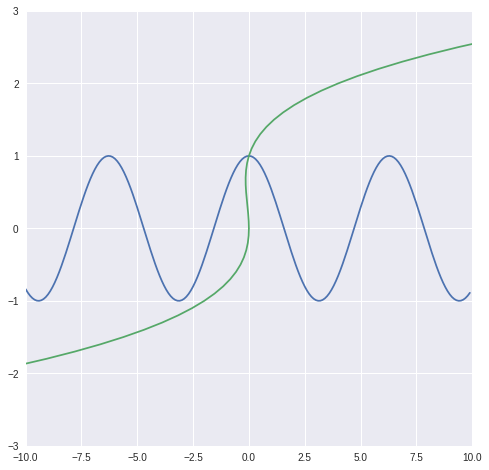

In [0]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.arange(-10, 10.0, 0.1)
y1 = np.cos(x1)

y2 = np.arange(-10, 10.0, 0.1)
x2 = y2**3 - y2**2

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.plot(x1,y1)
ax.plot(x2,y2)
ax.set_xlim([-10.0, 10.0])
ax.set_ylim([-3.0, 3.0])
plt.show()

## 1.2 Why are graphs that don't pass the vertical line test not considered "functions?"

They have different outputs for the same input, meaning two completely different answers could result.

# Functions as Relations

## 2.1 Which of the following relations are functions? Why?

\begin{align}
\text{Relation 1: } \{(1, 2), (3, 2), (1, 3)\}
\\
\text{Relation 2: } \{(1, 3), (2, 3), (6, 7)\}
\\
\text{Relation 3: } \{(9, 4), (2, 1), (9, 6)\}
\\
\text{Relation 4: } \{(6, 2), (8, 3), (6, 4)\}
\\
\text{Relation 5: } \{(2, 6), (2, 7), (2, 4)\}
\end{align}

1. No, repeated domain of 1
2. Yes, no repeated domain
3. No, repeated domain of 9
4. No, repeated domain of 6
5. No, repeated domain of 2

# Functions as a mapping between dimensions


## 3.1 for the following functions what is the dimensionality of the domain (input) and codomain (range/output)?

\begin{align}
m(𝑥_1,𝑥_2,𝑥_3)=(x_1+x_2, x_1+x_3, x_2+x_3)
\\
n(𝑥_1,𝑥_2,𝑥_3,𝑥_4)=(x_2^2 + x_3, x_2x_4)
\end{align}

\begin{align}
m(\mathbb{R}^3) = \mathbb{R}^3
\\
n(\mathbb{R}^4) = \mathbb{R}^2
\end{align}

## 3.2 Do you think it's possible to create a function that maps from a lower dimensional space to a higher dimensional space? If so, provide an example.

\begin{align}
m(x) = (x^2,-x,2+x)
\\
m(\mathbb{R}) = \mathbb{R}^3
\end{align}

# Vector Transformations

## 4.1 Plug the corresponding unit vectors into each function. Use the output vectors to create a transformation matrix.

\begin{align}
p(\begin{bmatrix}x_1 \\ x_2 \end{bmatrix}) = \begin{bmatrix} x_1 + 3x_2 \\2 x_2 - x_1 \\  \end{bmatrix} = \begin{bmatrix} 1 & 3 \\-1 & 2 \\  \end{bmatrix} \begin{bmatrix} x_1 \\x_2 \\  \end{bmatrix}
\\
\\
q(\begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}) = \begin{bmatrix} 4x_1 + x_2 + 2x_3 \\2 x_2 - x_1 + 3x_3 \\ 5x_1 - 2x_3 + x_2  \end{bmatrix} = \begin{bmatrix} 4 & 1 & 2 \\ -1 & 2 & 3 \\ 5 & 1 & -2  \end{bmatrix} \begin{bmatrix}x_1 \\ x_2 \\ x_3\end{bmatrix}
\end{align}

## 4.2 Verify that your transformation matrices are correct by choosing an input matrix and calculating the result both via the traditional functions above and also via vector-matrix multiplication.

In [0]:
p_ex = np.matrix([[4], [6]])
q_ex = np.matrix([[4], [6], [10]])

p_t = np.matrix([[1, 3], [-1, 2]])
q_t = np.matrix([[4, 1, 2], [-1, 2, 3], [5, 1, -2]])

p_out = np.matrix([[0], [0]])
p_out[0,0] = p_ex[0,0] * 1 + p_ex[1,0] * 3
p_out[1,0] = p_ex[0,0] * -1 + p_ex[1,0] * 2

q_out = np.matrix([[0], [0], [0]])
q_out[0,0] = q_ex[0,0] * 4 + q_ex[1,0] * 1 + q_ex[2,0] * 2
q_out[1,0] = q_ex[0,0] * -1 + q_ex[1,0] * 2 + q_ex[2,0] * 3
q_out[2,0] = q_ex[0,0] * 5 + q_ex[1,0] * 1 + q_ex[2,0] * -2

print("p")
print(p_t*p_ex)
print(p_out)
print()
print()
print("q")
print(q_t*q_ex)
print(q_out)


p
[[22]
 [ 8]]
[[22]
 [ 8]]


q
[[42]
 [38]
 [ 6]]
[[42]
 [38]
 [ 6]]


# Eigenvalues and Eigenvectors

## 5.1 In your own words, give an explanation for the intuition behind eigenvalues and eigenvectors.

Eigenvalues and eigenvectors are like the axis and relative scale that can be applied to a set of points. The vectors can only scaled during a transformation does not change direction when a transformation is applied.

# The Curse of Dimensionality

## 6.1 What are some of the challenges of working with high dimensional spaces?

Mainly the difficulty in coceptualizing beyond 3 dimensions, and the difficulty in finding patterns in higher dimensional space. Also, the amount a single dimension or variable contributes to the prediction of a variable generally goes down dramatically the more dimensions that are added.

## 6.2 What is the rule of thumb for how many observations you should have compared to parameters in your model?

n = number of dimensions

observations >= 5*n

# Principal Component Analysis

## 7.1 Load the UCI Machine Learning Repository's [Iris Dataset](https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv) and use PCA to isolate the dataset's first and second principal components and plot them on a graph. 

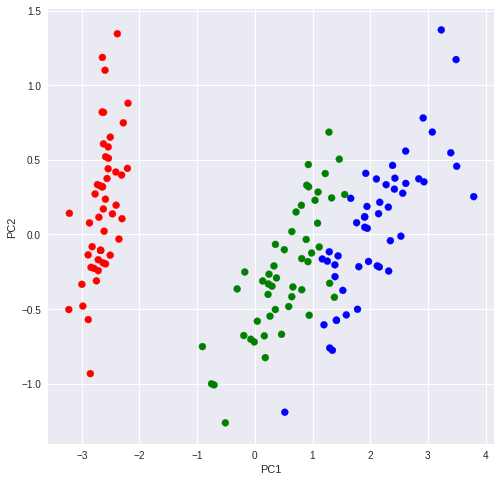

In [0]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

df = pd.read_csv("https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/d546eaee765268bf2f487608c537c05e22e4b221/iris.csv", header=0)

color_map = {'setosa': 'r', 'versicolor': 'g', 'virginica': 'b'}

pca = PCA(2)
pca.fit(df.iloc[:,:-1].values)
df2 = pca.transform(df.iloc[:,:-1].values)
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
ax.scatter(df2.T[0], df2.T[1], color=[color_map[x] for x in df['species'].values])
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
plt.show()

# Stretch Goal

## 1) Do NOT work on the stretch goal until you feel like you have a firm grasp of eigenvectors, eigenvalues, and PCA. Prioritize self-study over the stretch goal if you are not comfortable with those topics yet.

## 2) Explore further the intuition behind eigenvalues and eigenvectors by creating your very own eigenfaces:

<center>![Eigenfaces](https://i.pinimg.com/236x/1c/f1/01/1cf101a9859437a5d096a04b05be06b4--faces-tattoo.jpg)</center>

You don't necessarily have to use this resource, but this will get you started: 
[Eigenface Tutorial](https://sandipanweb.wordpress.com/2018/01/06/eigenfaces-and-a-simple-face-detector-with-pca-svd-in-python/)